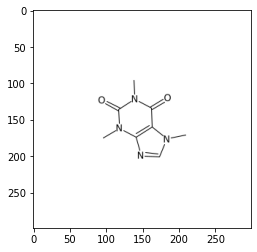

In [41]:
from matplotlib import pyplot as plt
import cv2
from decimer import DECIMER
from rdkit import Chem
import os
from selfies import encoder

img = cv2.imread('caffeine.png')
plt.imshow(img)

Using decimer package available at [this link](https://github.com/Kohulan/DECIMER-Image_Transformer). This package includes three different models:
- Canonical: Model trained on images depicted using canonical SMILES
- Isomeric: Model trained on images depicted using isomeric SMILES, which includes stereochemical information + ions
- Augmented: Model trained on images depicted using isomeric SMILES with augmentations

CN1C=NC2=C1C(=O)N(C)C(=O)N2C


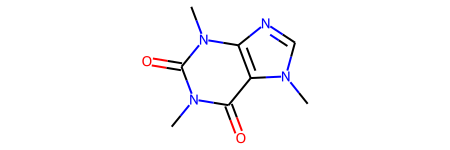

In [40]:
model_name = "Isomeric"
img_path = "caffeine.png"
caffeine_smiles = DECIMER.predict_SMILES(img_path,model_name)
print(caffeine_smiles)
Chem.MolFromSmiles(caffeine_smiles)

Como sugirió Rocío, transformamos la codificación de smiles en selfies. Hay una herramienta para realizar esta transformación disponible en este [GitHub link](https://github.com/aspuru-guzik-group/selfies_tutorial).

In [10]:
translation = encoder(caffeine_smiles)
print(translation)

[C][N][C][=N][C][=C][Ring1][Branch1_1][C][Branch1_2][C][=O][N][Branch1_1][C][C][C][Branch1_2][C][=O][N][Ring1][Branch2_2][C]


### Ejemplo 1

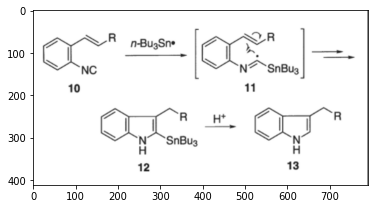

In [11]:
simple_mechanism = cv2.imread('test_images_pptx/12.2.png')
plt.imshow(simple_mechanism)

BrNC=CNNNNC=CNNNNNNNNNNNNNNCC
[Br][N][C][=C][N][N][N][N][C][=C][N][N][N][N][N][N][N][N][N][N][N][N][N][N][C][C]


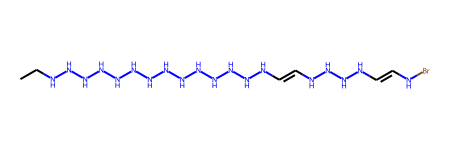

In [12]:
smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2.png',"Canonical")
print(smiles_code)
print(encoder(smiles_code))
Chem.MolFromSmiles(smiles_code)

C#CCOP(=S1)(O)NNCCNP(=S)(OCC#CSN1)ONC#CSS
[C][#C][C][O][P][Branch1_2][C][=S][Branch1_1][C][O][N][N][C][C][N][P][Branch1_2][C][=S][Branch1_1][Branch2_2][O][C][C][#C][S][N][Ring1][#C][O][N][C][#C][S][S]


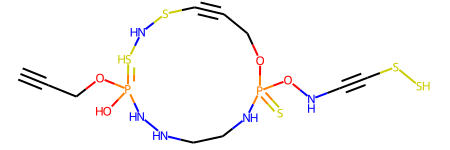

In [13]:
smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2.png',"Isomeric")
print(smiles_code)
print(encoder(smiles_code))
Chem.MolFromSmiles(smiles_code)

CNCC(O)POP(O)OP(N1P(CCP=CCP1)OS)OP(O)S
[C][N][C][C][Branch1_1][C][O][P][O][P][Branch1_1][C][O][O][P][Branch1_1][#C][N][P][Branch1_1][Branch2_2][C][C][P][=C][C][P][Ring1][Branch2_1][O][S][O][P][Branch1_1][C][O][S]


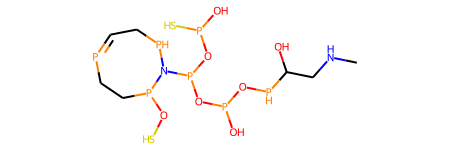

In [14]:
smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2.png',"Augmented")
print(smiles_code)
print(encoder(smiles_code))
Chem.MolFromSmiles(smiles_code)

### Ejemplo 2

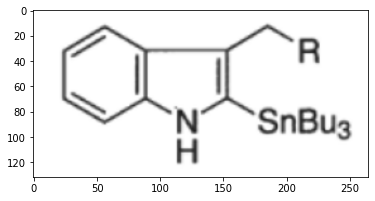

In [15]:
simple_molecule = cv2.imread('test_images_pptx/12.2_molecule.png')
plt.imshow(simple_molecule)

N=CNC=3C(=N)N=C1C=CC=CC1=CC=2C=CC=CC=2C=3CC=NO
[N][=C][N][C][C][Branch1_2][C][=N][N][=C][C][=C][C][=C][C][Ring1][Branch1_2][=C][C][C][=C][C][=C][C][Expl=Ring1][Branch1_2][C][Expl=Ring2][Ring1][C][C][C][=N][O]


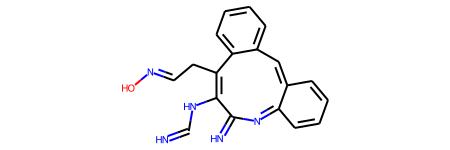

In [16]:
smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2_molecule.png',"Canonical")
print(smiles_code)
print(encoder(smiles_code))
Chem.MolFromSmiles(smiles_code)

C=C1C2=CC=C(C=C1)C=CC(=C(CC=NO)NC2=N)CC=N
[C][=C][C][=C][C][=C][Branch1_1][Branch1_1][C][=C][Ring1][Branch1_3][C][=C][C][Branch1_2][=N][=C][Branch1_1][Branch1_1][C][C][=N][O][N][C][Ring1][S][=N][C][C][=N]


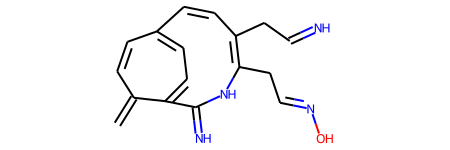

In [17]:
smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2_molecule.png',"Isomeric")
print(smiles_code)
print(encoder(smiles_code))
Chem.MolFromSmiles(smiles_code)

In [18]:
smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2_molecule.png',"Augmented")
print(smiles_code)
print(encoder(smiles_code))
Chem.MolFromSmiles(smiles_code)

C1=CC=C2C(=C(C=C1)C=N3N2N=C3CCNNO)C=NO
[C][=C][C][=C][C][Branch2_2][Ring1][Branch1_2][=C][Branch1_1][Branch1_1][C][=C][Ring1][Branch2_1][C][=N][N][Ring1][Branch2_1][N][=C][Ring1][Ring2][C][C][N][N][O][C][=N][O]


RDKit ERROR: [10:11:22] Explicit valence for atom # 9 N, 4, is greater than permitted
[10:11:22] Explicit valence for atom # 9 N, 4, is greater than permitted


Como podemos ver, los resultados no son buenos. Vamos a probar con una imagen de mayor resolución. Sólo realizaremos experimentos utilizando la configuración `isomeric`, ya que es la que reconoce estructuras más complejas.

In [19]:
from rdkit.Chem import Draw

def plot_and_process(img_path, config):
    img = cv2.imread(img_path)
    plt.title("Imagen original")
    plt.imshow(img)

    smiles_code = DECIMER.predict_SMILES(img_path,config)
    print("Predicción:",smiles_code)
    result_img = Chem.MolFromSmiles(smiles_code)
    plt.figure()
    plt.title("Predicción")
    plt.imshow(Draw.MolToImage(result_img))

Predicción: [C@H](=N)COP(F)(F)(NNNP(=S)(F)NNN=O)S


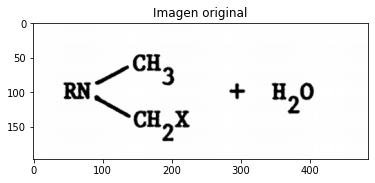

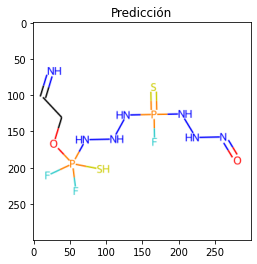

In [20]:
img_path = 'test_images_pptx/9_clean_molecule.png'
plot_and_process(img_path, 'Isomeric')

Predicción: C[C@@]([C@](N=N)(N=N)ON(=O)NN=NN)ON


RDKit ERROR: [10:11:38] Explicit valence for atom # 8 N, 4, is greater than permitted
[10:11:38] Explicit valence for atom # 8 N, 4, is greater than permitted


ValueError: Null molecule provided

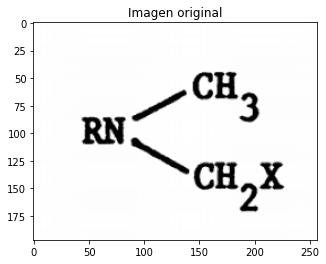

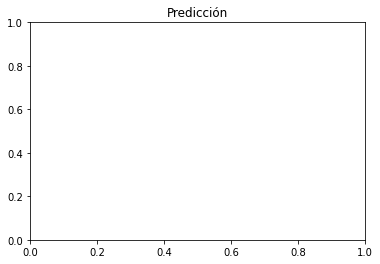

In [21]:
img_path = 'test_images_pptx/9_clean_molecule_2.png'
plot_and_process(img_path, 'Isomeric')

Predicción: CS1SPPPSSSSSSSS(PSSSSSS1(S)S)P


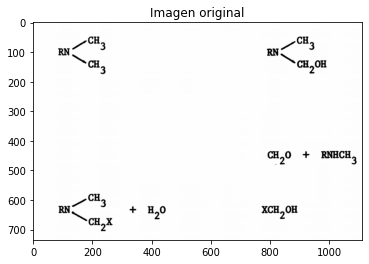

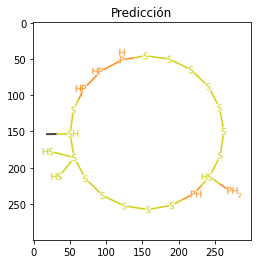

In [22]:
img_path = 'test_images_pptx/9_clean.png'
plot_and_process(img_path, 'Isomeric')

Predicción: C(S)(SSS)(SSS)S(SSSSSS)SSSSS


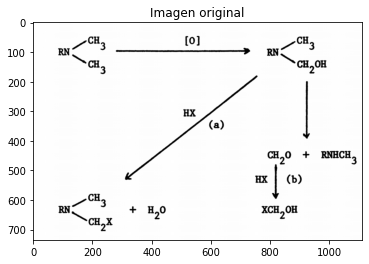

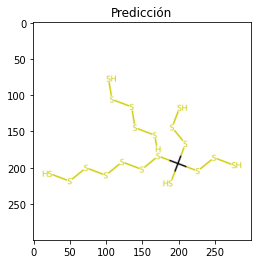

In [23]:
img_path = 'test_images_pptx/9.png'
plot_and_process(img_path, 'Isomeric')

Malos resultados. Intentemos de nuevo con otra imagen, más parecida a la que da como ejemplo la documentación.

Predicción: CCOP(=N1)(N=CCC(=O)N1C2=C3C(=CC=C2)C=CC=N3)O


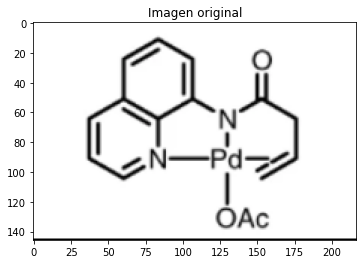

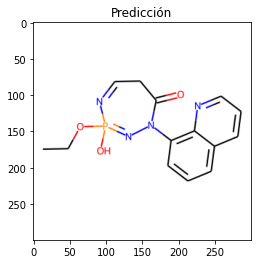

In [24]:
img_path = 'test_images_pptx/10_clean_molecule.png'
plot_and_process(img_path, 'Isomeric')

Seguimos obteniendo unos resultados incorrectos. Debemos averiguar qué está ocurriendo. ¿Cón qué datasets es entrenado DECIMER? En el README existe un enlace a los datasets, que contienen fórmulas codificadas en SMILES y SELFIES. En el propio repositorio se dan utilidades para:
- Filtrar las cadenas SMILES que no generan ningún compuesto válido
- Generar imágenes de los compuestos a partir de cadenas SMILES (ya tenemos nosotros el paquete rdkit)
- Transformar SMILES en SELFIES (ya tenemos nosotros el paquete selfies)

El archivo Utils/SmilesDepictor.java es el encargado de transformar SMILES en las imágenes utilizadas en el training. Utiliza una librería creada por OpenScience llamada Chemistry Development Kit (CDK). Es posible utilizarla en Python utilizando Jython.

Además, leyendo los issues del repositorio encontramos la siguiente información de parte del autor: _Thank you for your interest. currently, our tool only works with images with a scale of 299x299 and the molecule should be centred in the canvas. We are working on an input pipeline and will update the code soon._

Vamos a ver que ocurre generando imágenes con rdkit que cumplan estas características e introduciéndolas en DECIMER

In [114]:
def generate_compound_image_file(smiles, file_name):
    result = Chem.MolFromSmiles(smiles)
    Draw.MolToFile(result, file_name, size=(299,299))

def imagemagick_black(img_path, extension=".png"):
    os.system(f"magick convert {img_path}{extension} -negate -threshold 50% -negate {img_path}_black{extension}")

def imagemagick_resize_and_padding(img_path, extension=".png"):
    os.system(f"magick convert {img_path}{extension} -resize 60% -gravity center -extent 299x299 {img_path}_padding{extension}")

### Fórmula a: O=C(O)C1=CC=CC(O)C1O

Predicción: CC(C1C2=CC=C(C=C1)C(C(C2O)O)OC)C=O


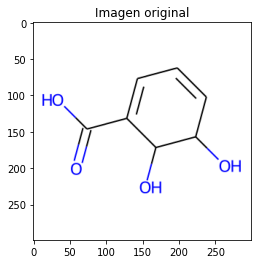

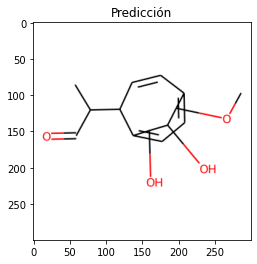

In [97]:
smiles_code = "O=C(O)C1=CC=CC(O)C1O"
img_path = "from_decimer_dataset/"+smiles_code
generate_compound_image_file(smiles_code, img_path+".png")
plot_and_process(img_path+".png", "Isomeric")

Predicción: CC(C12C=CCC(C=C1)C(C(C2O)O)C)=O


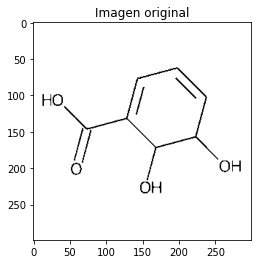

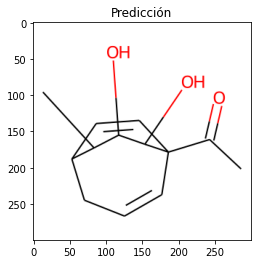

In [98]:
imagemagick_black(img_path.replace("(","\(").replace(")","\)"))
plot_and_process(img_path+"_black.png", "Isomeric")

Predicción: C1=CC(C2CC1=CC(C2O)C(=O)OO)


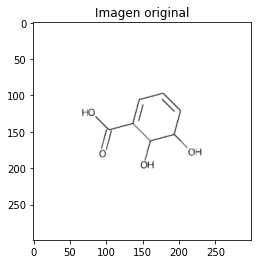

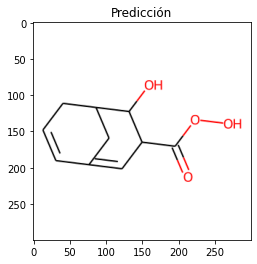

In [99]:
img_path = "from_decimer_dataset/"+smiles_code+"_black"
imagemagick_resize_and_padding(img_path.replace("(","\(").replace(")","\)"))
plot_and_process(img_path+"_padding.png", "Isomeric")

Predicción: C1=CC2(C(CC(=C1)C(C2)C)=O)OO


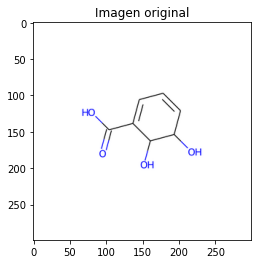

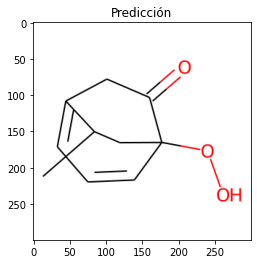

In [100]:
img_path = "from_decimer_dataset/"+smiles_code
imagemagick_resize_and_padding(img_path.replace("(","\(").replace(")","\)"))
plot_and_process(img_path+"_padding.png", "Isomeric")

### Fórmula b: OC(C)CN

Predicción: CC1(CCCCCC1CN=N=O)C(=O)O


RDKit ERROR: [08:24:32] Explicit valence for atom # 10 N, 4, is greater than permitted
[08:24:32] Explicit valence for atom # 10 N, 4, is greater than permitted


ValueError: Null molecule provided

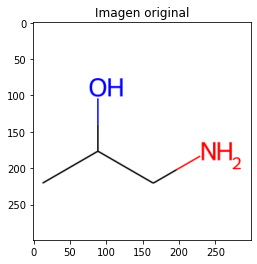

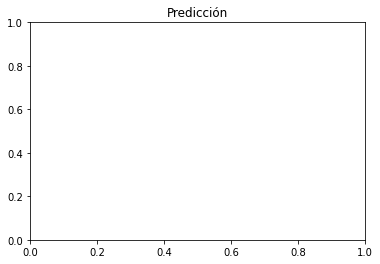

In [101]:
smiles_code = "OC(C)CN"
img_path = "from_decimer_dataset/"+smiles_code
generate_compound_image_file(smiles_code, img_path+".png")
plot_and_process(img_path+".png", "Isomeric")

Predicción: CC(CCCN=NC)C(OO)OO


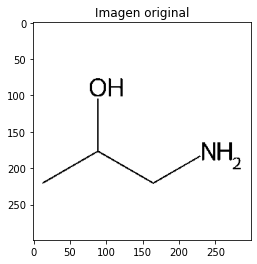

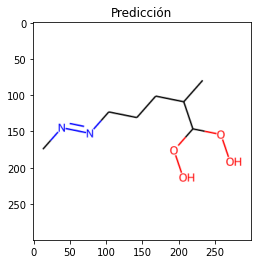

In [89]:
imagemagick_black(img_path.replace("(","\(").replace(")","\)"))
plot_and_process(img_path+"_black.png", "Isomeric")

Predicción: CC1C(CCN=[N-])C1O


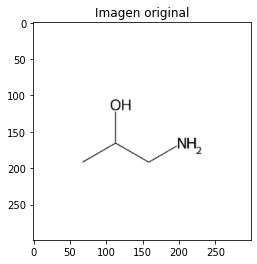

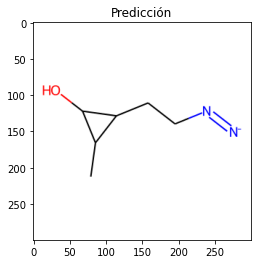

In [90]:
img_path = "from_decimer_dataset/"+smiles_code+"_black"
imagemagick_resize_and_padding(img_path.replace("(","\(").replace(")","\)"))
plot_and_process(img_path+"_padding.png", "Isomeric")

Predicción: CC1C(CCN=[N-])C1O


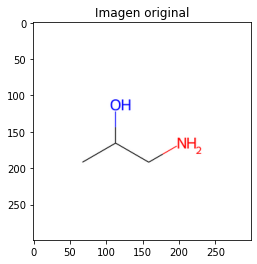

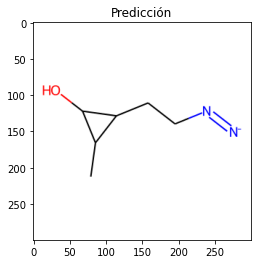

In [102]:
img_path = "from_decimer_dataset/"+smiles_code
imagemagick_resize_and_padding(img_path.replace("(","\(").replace(")","\)"))
plot_and_process(img_path+"_padding.png", "Isomeric")

### Fórmula c: N=1C=NC2=C(N=CN2CC)C1N

Predicción: CCCCN1CC=NC=C1C=C2C(=C(N)N=C)N=CC=N2


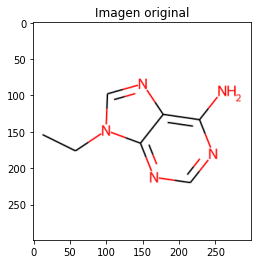

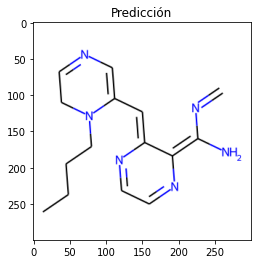

In [91]:
smiles_code = "N=1C=NC2=C(N=CN2CC)C1N"
img_path = "from_decimer_dataset/"+smiles_code
generate_compound_image_file(smiles_code, img_path+".png")
plot_and_process(img_path+".png", "Isomeric")

Predicción: CCCCN2C=NC1=C(C=N3C=CN=C1C2C3N)N


RDKit ERROR: [08:03:31] Explicit valence for atom # 10 N, 4, is greater than permitted
[08:03:31] Explicit valence for atom # 10 N, 4, is greater than permitted


ValueError: Null molecule provided

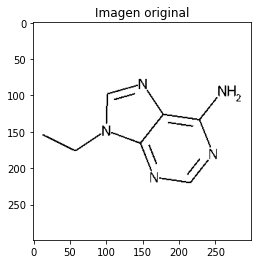

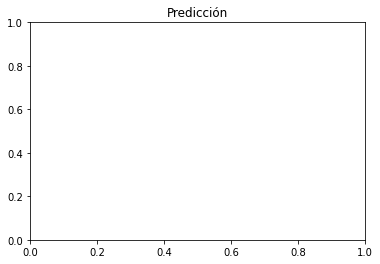

In [92]:
imagemagick_black(img_path.replace("(","\(").replace(")","\)"))
plot_and_process(img_path+"_black.png", "Isomeric")

Predicción: CCN2C=NC1=C(N)N=CN=C12


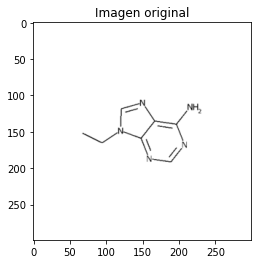

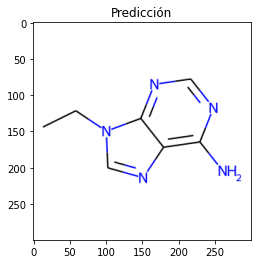

In [93]:
img_path = "from_decimer_dataset/"+smiles_code+"_black"
imagemagick_resize_and_padding(img_path.replace("(","\(").replace(")","\)"))
plot_and_process(img_path+"_padding.png", "Isomeric")

Predicción: CCN2C=NC1=C(N)N=CN=C12


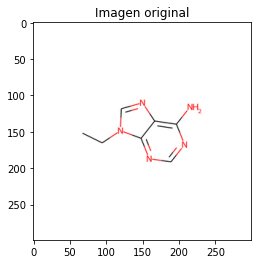

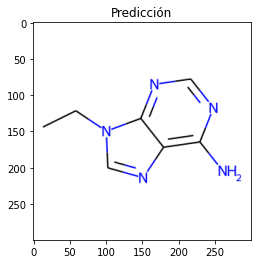

In [94]:
img_path = "from_decimer_dataset/"+smiles_code
imagemagick_resize_and_padding(img_path.replace("(","\(").replace(")","\)"))
plot_and_process(img_path+"_padding.png", "Isomeric")

### Probamos con objetos distintos a fórmulas químicas

Predicción: C14CCC1COCCNC2CN3CCOCC2COCC3OCC4


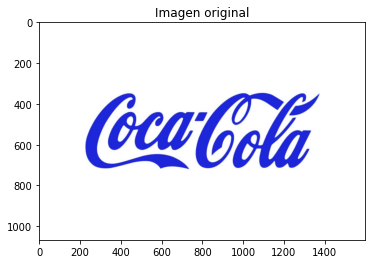

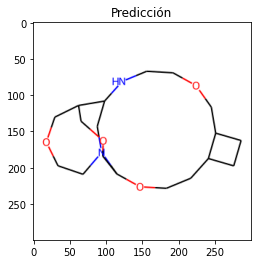

In [122]:
img_path = "coca_cola_logo"
plot_and_process(img_path+".jpg", "Isomeric")

In [ ]:
img_path = "arrow"
plot_and_process(img_path+".png", "Isomeric")

Predicción: CCC1=C2C=CC(=C1NN=C2CNCNN#CCNNN=C)NN


RDKit ERROR: [09:17:06] Explicit valence for atom # 15 N, 4, is greater than permitted
[09:17:06] Explicit valence for atom # 15 N, 4, is greater than permitted


ValueError: Null molecule provided

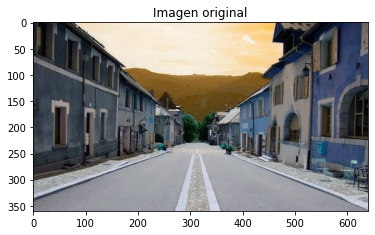

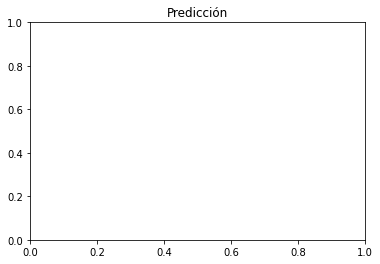

In [ ]:
img_path = "perspective.jpg"
plot_and_process(img_path, "Isomeric")

### Probamos con las fórmulas de ejemplo incluidas en el repositorio de DECIMER:

Predicción: CCCC3=CC1=C(N=CC(=C1NC2CCCCC2)C(=O)OC)N3


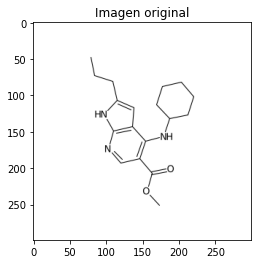

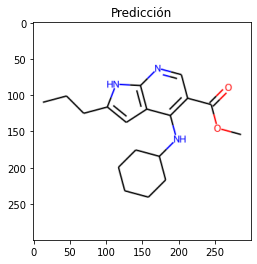

In [29]:
img_path = "DECIMER-Image_Transformer-master/Sample_Images/PubChem_142456991.png"
plot_and_process(img_path, "Isomeric")